In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings('ignore')
# warnings.filterwarnings(action='ignore', category=DataConversionWarning)
# warnings.filterwarnings(action='ignore', category=DeprecationWarning)
red = pd.read_csv("data/out_binary_class.csv")

In [28]:
X = red.iloc[:,:-1]
y = red.iloc[:,[-1]]
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [29]:
y.head()

,quality
0,0
1,0
2,0
3,1
4,0


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [31]:
X_train[:5]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
12,8.9,0.22,0.48,1.8,0.077,29.0,60.0,0.99680,3.39,0.53,9.4
381,7.6,0.51,0.24,2.4,0.091,8.0,38.0,0.99800,3.47,0.66,9.6
717,8.9,0.50,0.21,2.2,0.088,21.0,39.0,0.99692,3.33,0.83,11.1
497,7.8,0.91,0.07,1.9,0.058,22.0,47.0,0.99525,3.51,0.43,10.7
967,8.0,0.60,0.22,2.1,0.080,25.0,105.0,0.99613,3.30,0.49,9.9


In [32]:
print('X_train 크기 :', X_train.shape)
print('X_test 크기 :', X_test.shape)

X_train 크기 : (908, 11)
X_test 크기 : (227, 11)


In [33]:
print('y_train 크기 :', y_train.shape)
print('y_test 크기 :', y_test.shape)

y_train 크기 : (908, 1)
y_test 크기 : (227, 1)


In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)

pre = knn.predict(X_test) 
print(f'테스트 세트의 정확도 : {knn.score(X_test, y_test):.2f}')
print(f'pre :\n{pre[:10]}')
print(f'y   :\n{y_test["quality"].values[:10]}')

테스트 세트의 정확도 : 0.66
pre :
[1 1 1 0 1 1 1 1 0 1]
y   :
[1 1 0 0 1 1 1 0 0 1]


In [35]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn, X, y)
print(scores)
print('교차검증 평균점수 : {:.2f}'.format(scores.mean()))

[0.56728232 0.59102902 0.52254642]
교차검증 평균점수 : 0.56


In [36]:
from sklearn.model_selection import cross_validate
res = cross_validate(knn, X, y, return_train_score=True)
res_df = pd.DataFrame(res)
display(res_df)
print('평균 시간과 점수 : \n', res_df.mean())

,fit_time,score_time,test_score,train_score
0,0.003405,0.011956,0.567282,1.0
1,0.003367,0.017203,0.591029,1.0
2,0.002088,0.011655,0.522546,1.0


평균 시간과 점수 : 
 fit_time       0.002953
score_time     0.013605
test_score     0.560286
train_score    1.000000
dtype: float64


### 스케일러

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train_scaled, y_train)

pre = knn.predict(X_test_scaled) 
print(f'테스트 세트의 정확도 : {knn.score(X_test_scaled, y_test):.2f}')
print(f'pre :\n{pre[:10]}')
print(f'y   :\n{y_test["quality"].values[:10]}')

테스트 세트의 정확도 : 0.74
pre :
[1 0 0 0 1 1 1 0 0 1]
y   :
[1 1 0 0 1 1 1 0 0 1]


In [38]:
X_train[:3]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
12,8.9,0.22,0.48,1.8,0.077,29.0,60.0,0.99680,3.39,0.53,9.4
381,7.6,0.51,0.24,2.4,0.091,8.0,38.0,0.99800,3.47,0.66,9.6
717,8.9,0.50,0.21,2.2,0.088,21.0,39.0,0.99692,3.33,0.83,11.1


In [39]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler().fit(X_train)
X_train_scaled = robust_scaler.transform(X_train)
X_test_scaled = robust_scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train_scaled, y_train)

pre = knn.predict(X_test_scaled) 
print(f'테스트 세트의 정확도 : {knn.score(X_test_scaled, y_test):.2f}')
print(f'pre :\n{pre[:10]}')
print(f'y   :\n{y_test["quality"].values[:10]}')

테스트 세트의 정확도 : 0.75
pre :
[1 0 0 0 1 1 1 0 0 1]
y   :
[1 1 0 0 1 1 1 0 0 1]


In [41]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = minmax_scaler.transform(X_train)
X_test_scaled = minmax_scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train_scaled, y_train)

pre = knn.predict(X_test_scaled) 
print(f'테스트 세트의 정확도 : {knn.score(X_test_scaled, y_test):.2f}')
print(f'pre :\n{pre[:10]}')
print(f'y   :\n{y_test["quality"].values[:10]}')

테스트 세트의 정확도 : 0.71
pre :
[1 0 0 0 1 1 1 0 0 1]
y   :
[1 1 0 0 1 1 1 0 0 1]


In [42]:
from sklearn.preprocessing import MaxAbsScaler

maxabs_scaler = MaxAbsScaler().fit(X_train)
X_train_scaled = maxabs_scaler.transform(X_train)
X_test_scaled = maxabs_scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train_scaled, y_train)

pre = knn.predict(X_test_scaled) 
print(f'테스트 세트의 정확도 : {knn.score(X_test_scaled, y_test):.2f}')
print(f'pre :\n{pre[:10]}')
print(f'y   :\n{y_test["quality"].values[:10]}')

테스트 세트의 정확도 : 0.73
pre :
[1 0 1 0 0 1 0 0 0 1]
y   :
[1 1 0 0 1 1 1 0 0 1]


In [43]:
from sklearn.preprocessing import Normalizer

normal_scaler = Normalizer().fit(X_train)
X_train_scaled = normal_scaler.transform(X_train)
X_test_scaled = normal_scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train_scaled, y_train)

pre = knn.predict(X_test_scaled) 
print(f'테스트 세트의 정확도 : {knn.score(X_test_scaled, y_test):.2f}')
print(f'pre :\n{pre[:10]}')
print(f'y   :\n{y_test["quality"].values[:10]}')

테스트 세트의 정확도 : 0.65
pre :
[0 1 1 0 1 1 1 1 0 1]
y   :
[1 1 0 0 1 1 1 0 0 1]


**standard 사용**

In [100]:
X = red.iloc[:,:-1]
y = red.iloc[:,[-1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=8)

knn.fit(X_train_scaled, y_train)

pre = knn.predict(X_test_scaled) 
print(f'테스트 세트의 정확도 : {knn.score(X_test_scaled, y_test):.2f}')
print(f'pre :\n{pre[:10]}')
print(f'y   :\n{y_test["quality"].values[:10]}')

테스트 세트의 정확도 : 0.74
pre :
[0 1 0 1 1 1 0 0 0 1]
y   :
[1 1 0 0 1 1 1 0 0 1]


In [69]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(knn, random_state=42).fit(X_test_scaled, y_test)
eli5.show_weights(perm, feature_names = X.columns.tolist())

Weight,Feature
0.0784 ± 0.0245,residual sugar
0.0608 ± 0.0162,alcohol
0.0564 ± 0.0454,sulphates
0.0467 ± 0.0346,chlorides
0.0388 ± 0.0468,pH
0.0388 ± 0.0219,fixed acidity
0.0352 ± 0.0193,total sulfur dioxide
0.0352 ± 0.0295,volatile acidity
0.0344 ± 0.0219,free sulfur dioxide
0.0344 ± 0.0245,density


**eli5 => 매번 달라짐**

#### n_neighbors = 1 선정 이유

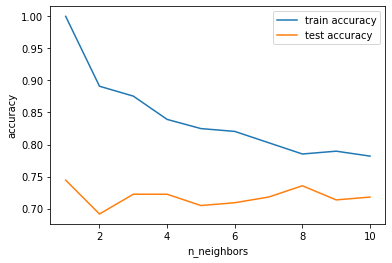

In [96]:
training_accuracy = []
test_accuracy = []
# 1에서 10까지 n_neighbors를 적용
# 피쳐의 제곱근정도를 지정할때 성능이 좋은 것으로 알려짐
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train_scaled, y_train)
    training_accuracy.append(clf.score(X_train_scaled, y_train))
    test_accuracy.append(clf.score(X_test_scaled, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="train accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [99]:
df_test = pd.DataFrame()
df_test['train'] = training_accuracy
df_test['test'] = test_accuracy
df_test['n'] = range(1,len(test_accuracy)+1)
df_test.set_index(['n'], inplace=True)
df_test.transpose()

n,1,2,3,4,5,6,7,8,9,10
train,1.000000,0.890969,0.875551,0.839207,0.824890,0.820485,0.802863,0.785242,0.789648,0.781938
test,0.744493,0.691630,0.722467,0.722467,0.704846,0.709251,0.718062,0.735683,0.713656,0.718062


In [150]:
# 정규화, 스케일링
data = pd.read_csv('data/out_binary_class_scaled.csv')
X = data.drop(['quality'], axis=1)
y = data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

knn = KNeighborsClassifier(n_neighbors=1)
# p -1 (맨하탄 거리 점수 더 낮음)
knn.fit(X_train, y_train)

pre = knn.predict(X_test) 
print(f'테스트 세트의 정확도 : {knn.score(X_test, y_test):.4f}')
print(f'pre :\n{pre[:10]}')
print(f'y   :\n{y_test.values[:10]}')

테스트 세트의 정확도 : 0.7489
pre :
[1 0 0 0 1 1 1 0 0 1]
y   :
[1 1 0 0 1 1 1 0 0 1]


In [143]:
perm = PermutationImportance(knn, random_state=42).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X.columns.tolist())

Weight,Feature
0.0837 ± 0.0374,residual sugar
0.0837 ± 0.0185,alcohol
0.0546 ± 0.0392,sulphates
0.0546 ± 0.0494,chlorides
0.0537 ± 0.0359,fixed acidity
0.0467 ± 0.0346,volatile acidity
0.0405 ± 0.0196,free sulfur dioxide
0.0370 ± 0.0205,total sulfur dioxide
0.0370 ± 0.0359,pH
0.0335 ± 0.0396,density


**모든 속성을 사용**

In [22]:
# 이 코드는 실행 안해도 됨

# tmp = eli5.explain_weights_df(perm)

# # 중요하지 않은 것들 제거
# important_cols = tmp[tmp['weight']>0.01]['feature'].map(lambda x: 
#                                                         int(x.replace('x', ''))).values
# important_cols = red.columns[important_cols].values

# X = red[important_cols]
# # X = X.drop(['chlorides', 'residual sugar'], axis=1)
# y = red['quality']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

# scaler = StandardScaler().fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# knn = KNeighborsClassifier(n_neighbors=1)

# knn.fit(X_train_scaled, y_train)

# pre = knn.predict(X_test_scaled) 
# print(f'테스트 세트의 정확도 : {knn.score(X_test_scaled, y_test):.2f}')
# print(f'pre :\n{pre[:10]}')
# print(f'y   :\n{y_test.values[:10]}')

In [144]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['feature'] = X.columns
vif.round(1)

,VIF Factor,feature
0,6.8,fixed acidity
1,2.1,volatile acidity
2,3.1,citric acid
3,1.7,residual sugar
4,1.3,chlorides
5,1.9,free sulfur dioxide
6,2.1,total sulfur dioxide
7,6.4,density
8,3.1,pH
9,1.3,sulphates


In [132]:
X = X.drop(['fixed acidity'], axis=1)
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['feature'] = X.columns
vif.round(1)

,VIF Factor,feature
0,2.1,volatile acidity
1,2.9,citric acid
2,1.6,residual sugar
3,1.3,chlorides
4,1.9,free sulfur dioxide
5,2.1,total sulfur dioxide
6,2.9,density
7,1.4,pH
8,1.3,sulphates
9,2.6,alcohol


In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)

pre = knn.predict(X_test) 
print(f'테스트 세트의 정확도 : {knn.score(X_test, y_test):.4f}')
print(f'pre :\n{pre[:10]}')
print(f'y   :\n{y_test.values[:10]}')

테스트 세트의 정확도 : 0.7709
pre :
[1 0 0 0 1 1 1 0 0 1]
y   :
[1 1 0 0 1 1 1 0 0 1]


In [135]:
from math import sqrt
from sklearn.metrics import mean_squared_error

# train data의 RMSE score
print(sqrt(mean_squared_error(y_test, pre)))

0.47861768653889236
